In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Setup nVidia OpenCL platform (do this with GPU runtime)
# nVidia GPU drivers for OpenCL (need to first connect to a GPU runtime on colab)
!nvidia-smi
!mkdir -p /etc/OpenCL/vendors && echo "libnvidia-opencl.so.1" > /etc/OpenCL/vendors/nvidia.icd
!apt-get update --fix-missing
!sudo apt install nvidia-driver-460 nvidia-cuda-toolkit clinfo
!clinfo

In [56]:
# OpenCLMatMult
%cd /content/drive/MyDrive/Colab\ Notebooks/OpenCL/OpenCL_Laplace/
# Create build folder
!mkdir build
%cd build
!rm -rf *
# Use cmake to generate makefile
!cmake ..
# Run
!make run

/content/drive/MyDrive/Colab Notebooks/OpenCL/OpenCLMatMult
mkdir: cannot create directory ‘build’: File exists
/content/drive/MyDrive/Colab Notebooks/OpenCL/OpenCLMatMult/build
-- The C compiler identification is GNU 11.4.0
-- The CXX compiler identification is GNU 11.4.0
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Found OpenACC compiler: /usr/bin/gcc
-- Found OpenMP_C: -fopenmp (found version "4.5")
-- Found OpenMP_CXX: -fopenmp (found version "4.5")
-- Found OpenMP: TRUE (found version "4.5")
-- Configuring done (3.2s)
-- Generating done (0.3s)
-- Build files have been written to: /content/drive/MyDrive/Colab Notebooks/Op

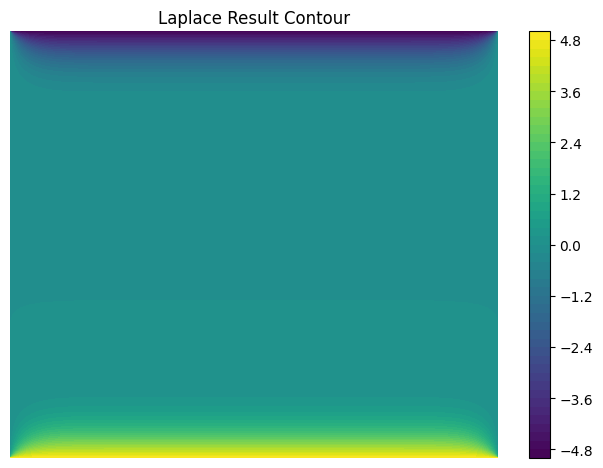

In [60]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/OpenCL/OpenCL_Laplace/laplace_grid_1024.csv', delimiter=',')
plt.contourf(data, levels=50, cmap='viridis')
plt.colorbar()
plt.title("Laplace Result Contour")
plt.axis('off')
plt.tight_layout()
plt.show()


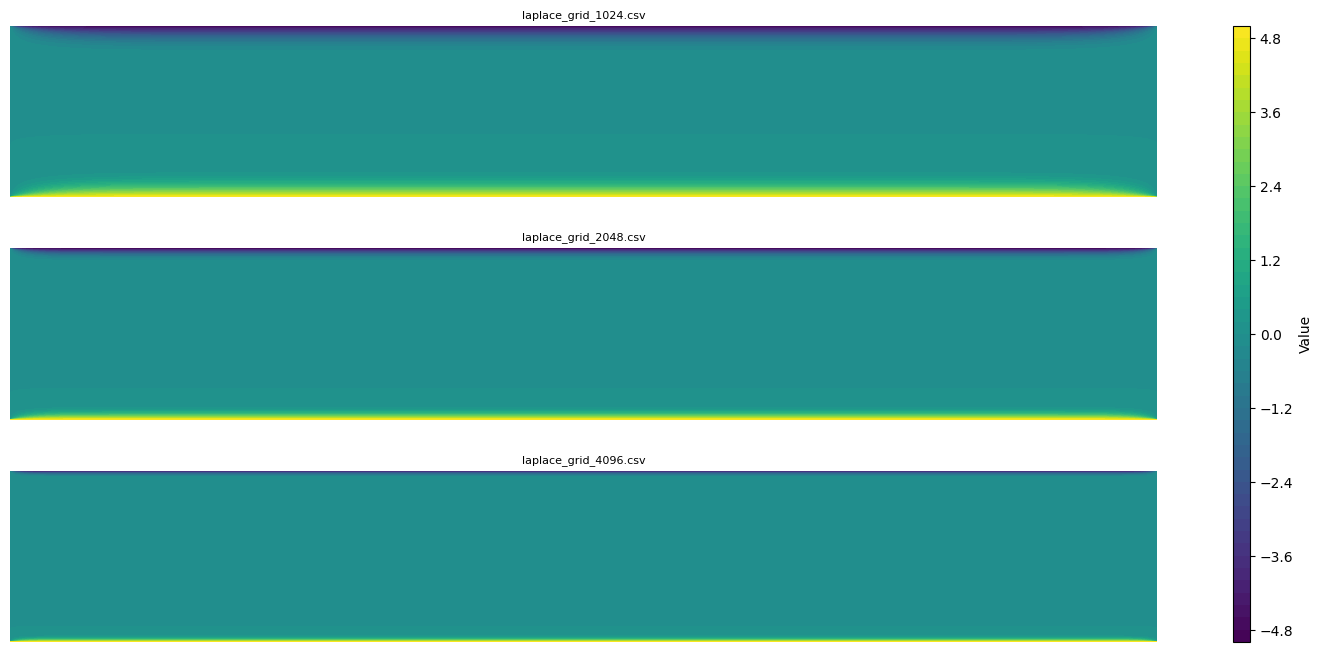

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os

# Manually enter full paths to CSV files
files = [
    "/content/drive/MyDrive/Colab Notebooks/OpenCL/OpenCL_Laplace/laplace_grid_1024.csv",
    "/content/drive/MyDrive/Colab Notebooks/OpenCL/OpenCL_Laplace/laplace_grid_2048.csv",
    "/content/drive/MyDrive/Colab Notebooks/OpenCL/OpenCL_Laplace/laplace_grid_4096.csv"
]

# Create a grid layout with space for the colorbar on the side
fig = plt.figure(figsize=(16, 8))
spec = gridspec.GridSpec(3, 4, width_ratios=[1, 1, 1, 0.05], wspace=0.3, hspace=0.3)

# Load all data first to determine consistent color scale
all_data = [np.loadtxt(f, delimiter=',') for f in files]
vmin = min(d.min() for d in all_data)
vmax = max(d.max() for d in all_data)

# Plot subplots
for i, data in enumerate(all_data):
    ax = fig.add_subplot(spec[i, 0:3])  # Place each plot in the first three columns
    c = ax.contourf(data, levels=50, cmap='viridis', vmin=vmin, vmax=vmax)
    ax.set_title(os.path.basename(files[i]), fontsize=8)
    ax.axis('off')

# Colorbar on the right side
cbar_ax = fig.add_subplot(spec[:, 3])  # Span all rows in the last column
fig.colorbar(c, cax=cbar_ax).set_label('Value')

plt.show()
